# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | First the good news, the clu..."
1,✅ Trip Verified | I have never travelled wit...
2,"✅ Trip Verified | Terrible overall, medium ser..."
3,✅ Trip Verified | London Heathrow to Male In...
4,Not Verified | Very good flight following an ...


In [4]:
import os

In [5]:
# Create the 'data' directory (if it doesn't exist)
os.makedirs("data", exist_ok=True)

In [6]:
# df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df=pd.read_csv("data/BA_reviews.csv")

In [8]:
df.head(20)

,Unnamed: 0,reviews
0,0,"✅ Trip Verified | Terrible overall, medium ser..."
1,1,✅ Trip Verified | London Heathrow to Male In...
2,2,Not Verified | Very good flight following an ...
3,3,Not Verified | An hour's delay due to late ar...
4,4,✅ Trip Verified | I booked through BA becaus...
5,5,✅ Trip Verified | British airways lost bags ...
6,6,✅ Trip Verified | The check in process and rew...
7,7,"✅ Trip Verified | We flew in November 2023, ..."
8,8,✅ Trip Verified | I left for London from Johan...
9,9,✅ Trip Verified | After an excellent flight ...


In [9]:
df.loc[1:1]

,Unnamed: 0,reviews
1,1,✅ Trip Verified | London Heathrow to Male In...


In [10]:
# Load data with proper headers
df = pd.read_csv("data/BA_reviews.csv", header=None, names=["ReviewID", "RawText"])

In [11]:
df

,ReviewID,RawText
0,NaN,reviews
1,0.0,"✅ Trip Verified | Terrible overall, medium ser..."
2,1.0,✅ Trip Verified | London Heathrow to Male In...
3,2.0,Not Verified | Very good flight following an ...
4,3.0,Not Verified | An hour's delay due to late ar...
...,...,...
996,995.0,✅ Trip Verified | I purchased a ticket for Du...
997,996.0,✅ Trip Verified | London to Shanghai. The Con...
998,997.0,Not Verified | I have often flown British Air...
999,998.0,Not Verified | Good morning. I would like to ...


In [12]:
# Split verification status and clean symbols
df["Verification"] = df["RawText"].str.split("\|").str[0].str.strip()
df["ReviewText"] = df["RawText"].str.split("\|").str[1].str.strip()

# Fix encoding errors
df["Verification"] = df["Verification"].str.replace("âœ…", "✓")
df["ReviewText"] = df["ReviewText"].str.replace("â€™", "'").str.replace("â€", "\"")

In [13]:
df

,ReviewID,RawText,Verification,ReviewText
0,NaN,reviews,reviews,NaN
1,0.0,"✅ Trip Verified | Terrible overall, medium ser...",✅ Trip Verified,"Terrible overall, medium service and the fligh..."
2,1.0,✅ Trip Verified | London Heathrow to Male In...,✅ Trip Verified,London Heathrow to Male In new business class....
3,2.0,Not Verified | Very good flight following an ...,Not Verified,Very good flight following an equally good fli...
4,3.0,Not Verified | An hour's delay due to late ar...,Not Verified,An hour's delay due to late arrival of the inc...
...,...,...,...,...
996,995.0,✅ Trip Verified | I purchased a ticket for Du...,✅ Trip Verified,I purchased a ticket for Dublin to Mauritius o...
997,996.0,✅ Trip Verified | London to Shanghai. The Con...,✅ Trip Verified,London to Shanghai. The Concorde room in Heath...
998,997.0,Not Verified | I have often flown British Air...,Not Verified,I have often flown British Airways and have co...
999,998.0,Not Verified | Good morning. I would like to ...,Not Verified,Good morning. I would like to write a review f...


In [14]:
df["FlightNumber"] = df["ReviewText"].str.extract(r'(BA\s?\d+|BA\s?[A-Z]+\s?\d+)')

In [15]:
df

,ReviewID,RawText,Verification,ReviewText,FlightNumber
0,NaN,reviews,reviews,NaN,NaN
1,0.0,"✅ Trip Verified | Terrible overall, medium ser...",✅ Trip Verified,"Terrible overall, medium service and the fligh...",NaN
2,1.0,✅ Trip Verified | London Heathrow to Male In...,✅ Trip Verified,London Heathrow to Male In new business class....,NaN
3,2.0,Not Verified | Very good flight following an ...,Not Verified,Very good flight following an equally good fli...,NaN
4,3.0,Not Verified | An hour's delay due to late ar...,Not Verified,An hour's delay due to late arrival of the inc...,NaN
...,...,...,...,...,...
996,995.0,✅ Trip Verified | I purchased a ticket for Du...,✅ Trip Verified,I purchased a ticket for Dublin to Mauritius o...,NaN
997,996.0,✅ Trip Verified | London to Shanghai. The Con...,✅ Trip Verified,London to Shanghai. The Concorde room in Heath...,NaN
998,997.0,Not Verified | I have often flown British Air...,Not Verified,I have often flown British Airways and have co...,NaN
999,998.0,Not Verified | Good morning. I would like to ...,Not Verified,Good morning. I would like to write a review f...,NaN


In [16]:
date_df = df["ReviewText"].str.extract(
    r'(\d{1,2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4})|(\d{1,2}/\d{1,2}/\d{2,4})'
)

In [17]:
df

,ReviewID,RawText,Verification,ReviewText,FlightNumber
0,NaN,reviews,reviews,NaN,NaN
1,0.0,"✅ Trip Verified | Terrible overall, medium ser...",✅ Trip Verified,"Terrible overall, medium service and the fligh...",NaN
2,1.0,✅ Trip Verified | London Heathrow to Male In...,✅ Trip Verified,London Heathrow to Male In new business class....,NaN
3,2.0,Not Verified | Very good flight following an ...,Not Verified,Very good flight following an equally good fli...,NaN
4,3.0,Not Verified | An hour's delay due to late ar...,Not Verified,An hour's delay due to late arrival of the inc...,NaN
...,...,...,...,...,...
996,995.0,✅ Trip Verified | I purchased a ticket for Du...,✅ Trip Verified,I purchased a ticket for Dublin to Mauritius o...,NaN
997,996.0,✅ Trip Verified | London to Shanghai. The Con...,✅ Trip Verified,London to Shanghai. The Concorde room in Heath...,NaN
998,997.0,Not Verified | I have often flown British Air...,Not Verified,I have often flown British Airways and have co...,NaN
999,998.0,Not Verified | Good morning. I would like to ...,Not Verified,Good morning. I would like to write a review f...,NaN


In [18]:
# Combine the two columns: if one is NaN, take the other.
df["FlightDate"] = date_df[0].fillna(date_df[1])

In [19]:
df

,ReviewID,RawText,Verification,ReviewText,FlightNumber,FlightDate
0,NaN,reviews,reviews,NaN,NaN,NaN
1,0.0,"✅ Trip Verified | Terrible overall, medium ser...",✅ Trip Verified,"Terrible overall, medium service and the fligh...",NaN,NaN
2,1.0,✅ Trip Verified | London Heathrow to Male In...,✅ Trip Verified,London Heathrow to Male In new business class....,NaN,NaN
3,2.0,Not Verified | Very good flight following an ...,Not Verified,Very good flight following an equally good fli...,NaN,NaN
4,3.0,Not Verified | An hour's delay due to late ar...,Not Verified,An hour's delay due to late arrival of the inc...,NaN,NaN
...,...,...,...,...,...,...
996,995.0,✅ Trip Verified | I purchased a ticket for Du...,✅ Trip Verified,I purchased a ticket for Dublin to Mauritius o...,NaN,NaN
997,996.0,✅ Trip Verified | London to Shanghai. The Con...,✅ Trip Verified,London to Shanghai. The Concorde room in Heath...,NaN,NaN
998,997.0,Not Verified | I have often flown British Air...,Not Verified,I have often flown British Airways and have co...,NaN,NaN
999,998.0,Not Verified | Good morning. I would like to ...,Not Verified,Good morning. I would like to write a review f...,NaN,NaN


In [20]:
# Extract the two capturing groups into a temporary DataFrame
route_df = df["ReviewText"].str.extract(
    r'(?:from|between|to)\s([A-Za-z\s]+)\s(?:to|and)\s([A-Za-z\s]+)'
)

# Combine the two columns into one "Route" column (using " to " as the separator)
df["Route"] = route_df[0].fillna('') + " to " + route_df[1].fillna('')

In [21]:
# Define issue categories
issues = {
    "Delay": r"delay|cancel|late|reschedule|hold",
    "Baggage": r"bag|luggage|lost|damage",
    "CustomerService": r"rude|staff|crew|service|unhelpful",
    "Compensation": r"compensate|refund|reimburse|claim",
    "Seating": r"seat|legroom|uncomfortable|recline"
}

# Add boolean flags for each issue
for issue, pattern in issues.items():
    df[issue] = df["ReviewText"].str.contains(pattern, case=False, regex=True)

In [22]:
df

,ReviewID,RawText,Verification,ReviewText,FlightNumber,FlightDate,Route,Delay,Baggage,CustomerService,Compensation,Seating
0,NaN,reviews,reviews,NaN,NaN,NaN,to,NaN,NaN,NaN,NaN,NaN
1,0.0,"✅ Trip Verified | Terrible overall, medium ser...",✅ Trip Verified,"Terrible overall, medium service and the fligh...",NaN,NaN,to,True,False,True,False,False
2,1.0,✅ Trip Verified | London Heathrow to Male In...,✅ Trip Verified,London Heathrow to Male In new business class....,NaN,NaN,to,False,False,True,False,False
3,2.0,Not Verified | Very good flight following an ...,Not Verified,Very good flight following an equally good fli...,NaN,NaN,to,False,False,False,False,False
4,3.0,Not Verified | An hour's delay due to late ar...,Not Verified,An hour's delay due to late arrival of the inc...,NaN,NaN,to,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
996,995.0,✅ Trip Verified | I purchased a ticket for Du...,✅ Trip Verified,I purchased a ticket for Dublin to Mauritius o...,NaN,NaN,make it to so I got in touch with British Airw...,True,False,False,True,False
997,996.0,✅ Trip Verified | London to Shanghai. The Con...,✅ Trip Verified,London to Shanghai. The Concorde room in Heath...,NaN,NaN,to,False,False,True,False,False
998,997.0,Not Verified | I have often flown British Air...,Not Verified,I have often flown British Airways and have co...,NaN,NaN,to,True,True,True,False,True
999,998.0,Not Verified | Good morning. I would like to ...,Not Verified,Good morning. I would like to write a review f...,NaN,NaN,write this review as I it took me a while to g...,False,False,True,False,False


In [23]:
df.shape

(1001, 12)

In [24]:
df.columns

Index(['ReviewID', 'RawText', 'Verification', 'ReviewText', 'FlightNumber',
       'FlightDate', 'Route', 'Delay', 'Baggage', 'CustomerService',
       'Compensation', 'Seating'],
      dtype='object')

In [25]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [26]:
from textblob import TextBlob

def get_sentiment(text):
    # Return "Neutral" if the value is not a string
    if not isinstance(text, str):
        return "Neutral"
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.2:
        return "Positive"
    elif polarity < -0.2:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["ReviewText"].apply(get_sentiment)

In [27]:
df

,ReviewID,RawText,Verification,ReviewText,FlightNumber,FlightDate,Route,Delay,Baggage,CustomerService,Compensation,Seating,Sentiment
0,NaN,reviews,reviews,NaN,NaN,NaN,to,NaN,NaN,NaN,NaN,NaN,Neutral
1,0.0,"✅ Trip Verified | Terrible overall, medium ser...",✅ Trip Verified,"Terrible overall, medium service and the fligh...",NaN,NaN,to,True,False,True,False,False,Negative
2,1.0,✅ Trip Verified | London Heathrow to Male In...,✅ Trip Verified,London Heathrow to Male In new business class....,NaN,NaN,to,False,False,True,False,False,Positive
3,2.0,Not Verified | Very good flight following an ...,Not Verified,Very good flight following an equally good fli...,NaN,NaN,to,False,False,False,False,False,Positive
4,3.0,Not Verified | An hour's delay due to late ar...,Not Verified,An hour's delay due to late arrival of the inc...,NaN,NaN,to,True,False,True,False,True,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,995.0,✅ Trip Verified | I purchased a ticket for Du...,✅ Trip Verified,I purchased a ticket for Dublin to Mauritius o...,NaN,NaN,make it to so I got in touch with British Airw...,True,False,False,True,False,Neutral
997,996.0,✅ Trip Verified | London to Shanghai. The Con...,✅ Trip Verified,London to Shanghai. The Concorde room in Heath...,NaN,NaN,to,False,False,True,False,False,Positive
998,997.0,Not Verified | I have often flown British Air...,Not Verified,I have often flown British Airways and have co...,NaN,NaN,to,True,True,True,False,True,Neutral
999,998.0,Not Verified | Good morning. I would like to ...,Not Verified,Good morning. I would like to write a review f...,NaN,NaN,write this review as I it took me a while to g...,False,False,True,False,False,Neutral


In [28]:
df['Sentiment'].value_counts()

Neutral     721
Positive    203
Negative     77
Name: Sentiment, dtype: int64

In [29]:
import matplotlib.pyplot as plt

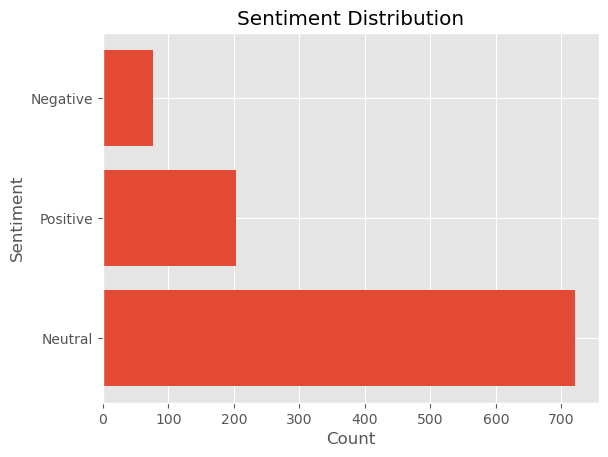

In [30]:
# Get the counts of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot a horizontal bar chart using the index (labels) and values (counts)
plt.barh(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution')
plt.show()

In [31]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [32]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to C:\Users\Emmanuel
[nltk_data]     Kusi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Emmanuel
[nltk_data]     Kusi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Emmanuel Kusi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [33]:
tokens=df['ReviewText'][50]
tokens[:10]

'BA is bare'

In [34]:
tokens=nltk.word_tokenize(tokens)
tokens

['BA',
 'is',
 'barely',
 'a',
 'step',
 'above',
 'low',
 'cost',
 'airlines',
 '.',
 'They',
 'try',
 'to',
 'dime',
 'and',
 'nickel',
 'everywhere',
 'possible',
 '.',
 'I',
 'now',
 'found',
 'out',
 'that',
 'you',
 'can',
 'not',
 'select',
 'a',
 'seat',
 'a',
 'check',
 'in',
 'anymore',
 'when',
 'you',
 'have',
 'no',
 'baggage',
 '.',
 'Next',
 'time',
 'I',
 'go',
 'with',
 'low',
 'cost',
 'carrier',
 'since',
 'there',
 'is',
 'virtually',
 'no',
 'difference',
 'anymore',
 '.']

In [35]:
tagged=nltk.pos_tag(tokens)

In [36]:
tagged[:10]

[('BA', 'NNP'),
 ('is', 'VBZ'),
 ('barely', 'RB'),
 ('a', 'DT'),
 ('step', 'NN'),
 ('above', 'IN'),
 ('low', 'JJ'),
 ('cost', 'NN'),
 ('airlines', 'NNS'),
 ('.', '.')]

In [37]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Emmanuel Kusi\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Emmanuel
[nltk_data]     Kusi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [38]:
entities=nltk.chunk.ne_chunk(tagged)

In [39]:
entities.pprint()

(S
  BA/NNP
  is/VBZ
  barely/RB
  a/DT
  step/NN
  above/IN
  low/JJ
  cost/NN
  airlines/NNS
  ./.
  They/PRP
  try/VBP
  to/TO
  dime/VB
  and/CC
  nickel/VB
  everywhere/RB
  possible/JJ
  ./.
  I/PRP
  now/RB
  found/VBD
  out/RP
  that/IN
  you/PRP
  can/MD
  not/RB
  select/VB
  a/DT
  seat/NN
  a/DT
  check/NN
  in/IN
  anymore/RB
  when/WRB
  you/PRP
  have/VBP
  no/DT
  baggage/NN
  ./.
  Next/JJ
  time/NN
  I/PRP
  go/VBP
  with/IN
  low/JJ
  cost/NN
  carrier/NN
  since/IN
  there/EX
  is/VBZ
  virtually/RB
  no/DT
  difference/NN
  anymore/RB
  ./.)


In [40]:
 nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Emmanuel
[nltk_data]     Kusi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [42]:
review_text=df['ReviewText'][20]
review_text

"British Airways stranding my wife and I at Heathrow Airport for 2.5 days, with no access to our baggage. We we told by airline employees to purchase any necessities (toiletries, refreshments, etc.) and we'd be reimbursed. That claim was denied, with BA claiming that weather was the reason for the delay (an outright lie since every other airline in London was flying on-time). We were unable to to anything besides stand in lines for vouchers, stand in lines for shuttles, stand in line for reservations, etc. for 48+ hours. It was an absolute nightmare and I will never fly BA again."

In [43]:
sia= SentimentIntensityAnalyzer()

In [44]:
sentiment_scores = sia.polarity_scores(review_text)
sentiment_scores

{'neg': 0.072, 'neu': 0.928, 'pos': 0.0, 'compound': -0.7506}

In [45]:
df.columns

Index(['ReviewID', 'RawText', 'Verification', 'ReviewText', 'FlightNumber',
       'FlightDate', 'Route', 'Delay', 'Baggage', 'CustomerService',
       'Compensation', 'Seating', 'Sentiment'],
      dtype='object')

In [46]:
df.shape

(1001, 13)

In [47]:
#Run the polarity score on the entire dataset

# Create an empty dictionary to store results
res={}

# Ensure 'ReviewText' is treated as a string and handle NaN values
for index, row in df.iterrows():
    text = str(row['ReviewText']) if pd.notna(row['ReviewText']) else ""
    myid = row['ReviewID']
    res[myid] = sia.polarity_scores(text)

# Convert dictionary to DataFrame
sentiment_df = pd.DataFrame.from_dict(res, orient='index')
sentiment_df.reset_index(inplace=True)
sentiment_df.rename(columns={'index': 'ReviewID'}, inplace=True)

# Merge sentiment results back to original dataframe
df = df.merge(sentiment_df, on='ReviewID', how='left')

# Print sample results
print(df[['ReviewID', 'ReviewText', 'compound']].head())
    

   ReviewID                                         ReviewText  compound
0       NaN                                                NaN       NaN
1       0.0  Terrible overall, medium service and the fligh...   -0.5994
2       1.0  London Heathrow to Male In new business class....    0.9892
3       2.0  Very good flight following an equally good fli...    0.8514
4       3.0  An hour's delay due to late arrival of the inc...    0.8442


In [48]:
#Print out the score of each row and set to a dataframe
vaders=pd.DataFrame(res).T

In [49]:
vaders=vaders.reset_index().rename(columns={'index':'Id'})

In [50]:
vaders=vaders.merge(df,how='left')

In [51]:
vaders.head()

,Id,neg,neu,pos,compound,ReviewID,RawText,Verification,ReviewText,FlightNumber,FlightDate,Route,Delay,Baggage,CustomerService,Compensation,Seating,Sentiment
0,NaN,0.000,0.000,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.230,0.649,0.121,-0.5994,0.0,"✅ Trip Verified | Terrible overall, medium ser...",✅ Trip Verified,"Terrible overall, medium service and the fligh...",NaN,NaN,to,True,False,True,False,False,Negative
2,1.0,0.011,0.650,0.338,0.9892,1.0,✅ Trip Verified | London Heathrow to Male In...,✅ Trip Verified,London Heathrow to Male In new business class....,NaN,NaN,to,False,False,True,False,False,Positive
3,2.0,0.000,0.729,0.271,0.8514,2.0,Not Verified | Very good flight following an ...,Not Verified,Very good flight following an equally good fli...,NaN,NaN,to,False,False,False,False,False,Positive
4,3.0,0.106,0.676,0.218,0.8442,3.0,Not Verified | An hour's delay due to late ar...,Not Verified,An hour's delay due to late arrival of the inc...,NaN,NaN,to,True,False,True,False,True,Neutral


## Plot Vader results

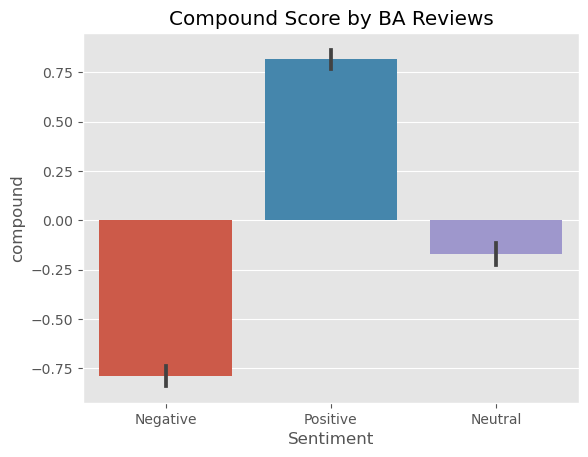

In [52]:
ax=sns.barplot(data=vaders, x='Sentiment',y='compound')
ax.set_title('Compound Score by BA Reviews')
plt.show()

# Roberta Pretrained Model

In [53]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [54]:
!pip install --upgrade urllib3
!pip install --upgrade botocore boto3 transformers

In [55]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [56]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [57]:
MODEL=f'cardiffnlp/twitter-roberta-base-sentiment'
tonkenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [58]:
rews=df['ReviewText'][50]
rews

'BA is barely a step above low cost airlines. They try to dime and nickel everywhere possible. I now found out that you cannot select a seat a check in anymore when you have no baggage. Next time I go with low cost carrier since there is virtually no difference anymore.'

In [59]:
sia.polarity_scores(rews)

{'neg': 0.161, 'neu': 0.839, 'pos': 0.0, 'compound': -0.7246}

In [60]:
print(model.config.num_labels) 

3


In [61]:
#Run the Roberta Model
encoded_text=tonkenizer(rews,return_tensors='pt', truncation=True, max_length=514)
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
score=softmax(scores)
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}

print(scores_dict)

{'roberta_neg': 1.1687748, 'roberta_neu': 0.3102007, 'roberta_pos': -1.5694213}


## Run the Roberta pretrained Model on the entire dataset

In [62]:
def polarity_scores_roberta(rews):
    encoded_text=tonkenizer(rews, return_tensors='pt', truncation=True, max_length=512)
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    score=softmax(scores)
    scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
    }
    return scores_dict

In [63]:
# Apply to DataFrame
res = {}
for index, row in df.iterrows():
    text = str(row['ReviewText']) if pd.notna(row['ReviewText']) else ""
    myid = row['ReviewID']
    
    # VADER Sentiment
    vader_result = sia.polarity_scores(text)
    vader_results_rename = {f"vader_{key}": value for key, value in vader_result.items()}
    
    # RoBERTa Sentiment
    roberta_result = polarity_scores_roberta(text)
    
    # Combine results
    res[myid] = {**vader_results_rename, **roberta_result}

In [64]:
roberta_result

{'roberta_neg': 2.0024679,
 'roberta_neu': 0.06576393,
 'roberta_pos': -2.0764883}

In [65]:
res[myid]

{'vader_neg': 0.113,
 'vader_neu': 0.815,
 'vader_pos': 0.073,
 'vader_compound': -0.7106,
 'roberta_neg': 2.0024679,
 'roberta_neu': 0.06576393,
 'roberta_pos': -2.0764883}

In [67]:
print("results_df columns:", results_df.columns.tolist())
print("df columns:", df.columns.tolist())

results_df columns: ['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos']
df columns: ['ReviewID', 'RawText', 'Verification', 'ReviewText', 'FlightNumber', 'FlightDate', 'Route', 'Delay', 'Baggage', 'CustomerService', 'Compensation', 'Seating', 'Sentiment', 'neg', 'neu', 'pos', 'compound']


In [68]:
#Print out the score of each row and set to a dataframe
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
# Merge DataFrames using explicit keys
results_df = results_df.merge(
    df,
    how='left',
    left_on='Id',
    right_on='ReviewID'
)

# Verify merged DataFrame
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ReviewID,RawText,...,Delay,Baggage,CustomerService,Compensation,Seating,Sentiment,neg,neu,pos,compound
0,NaN,0.000,0.000,0.000,0.0000,-0.175723,0.382249,-0.058448,NaN,reviews,...,NaN,NaN,NaN,NaN,NaN,Neutral,NaN,NaN,NaN,NaN
1,0.0,0.230,0.649,0.121,-0.5994,3.014781,-0.396610,-2.591871,0.0,"✅ Trip Verified | Terrible overall, medium ser...",...,True,False,True,False,False,Negative,0.230,0.649,0.121,-0.5994
2,1.0,0.011,0.650,0.338,0.9892,-2.491067,-0.200461,3.171210,1.0,✅ Trip Verified | London Heathrow to Male In...,...,False,False,True,False,False,Positive,0.011,0.650,0.338,0.9892
3,2.0,0.000,0.729,0.271,0.8514,-2.729493,-0.311625,3.654717,2.0,Not Verified | Very good flight following an ...,...,False,False,False,False,False,Positive,0.000,0.729,0.271,0.8514
4,3.0,0.106,0.676,0.218,0.8442,-1.752454,0.226312,1.741695,3.0,Not Verified | An hour's delay due to late ar...,...,True,False,True,False,True,Neutral,0.106,0.676,0.218,0.8442


In [69]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ReviewID', 'RawText',
       'Verification', 'ReviewText', 'FlightNumber', 'FlightDate', 'Route',
       'Delay', 'Baggage', 'CustomerService', 'Compensation', 'Seating',
       'Sentiment', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

## Compare Scores between models

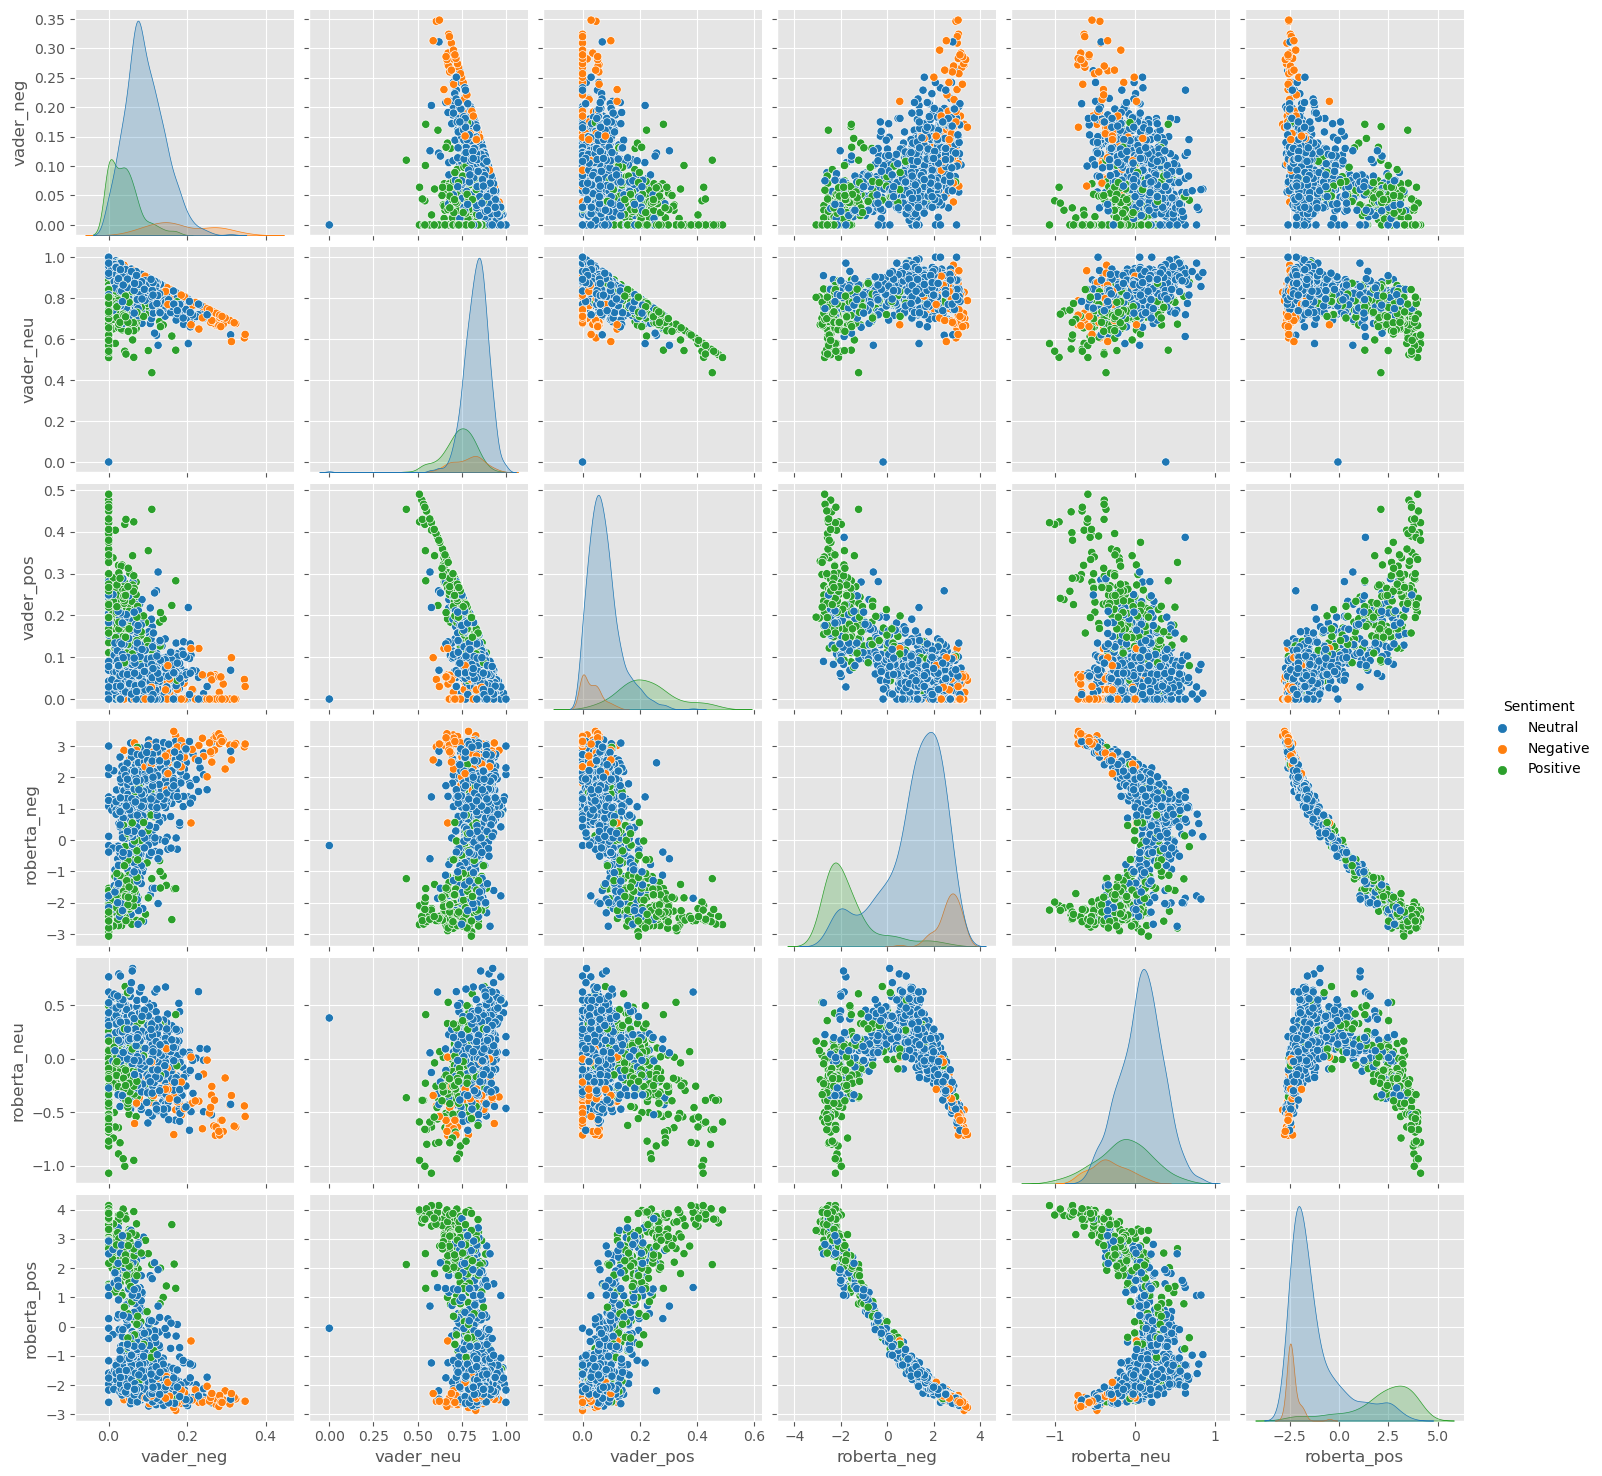

In [71]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Sentiment',
            palette='tab10')
    

In [77]:
# Get the most positive review according to Roberta
most_positive_review = results_df.query("Sentiment == 'Positive'").sort_values('roberta_pos', ascending=False)['ReviewText'].values[0]
print(most_positive_review)

The service was excellent. The cabin staff were attentive and efficient. The food and drinks were very good. The seat in the new suites is extremely comfortable and the additional privacy is really nice. Overall a very enjoyable flight.


In [78]:
# Get the most negative review according to Roberta
most_negative_review = results_df.query("Sentiment == 'Negative'").sort_values('roberta_neg', ascending=False)['ReviewText'].values[0]
print(most_negative_review)

The staff are very rude and not trained properly. No exceptions are made for children and elderly people. The price of the ticket is very expensive given the distance and the service is extremely extremely poor


In [79]:
# Get the most neutral review according to Roberta
most_neutral_review = results_df.query("Sentiment == 'Neutral'").sort_values('roberta_neu', ascending=False)['ReviewText'].values[0]
print(most_neutral_review)

Dubai to London. My husband and I traveled together. He got business class, my ticket was a last minute add-on, so was Premium Economy instead. After we boarded, my husband came to me to give me his pillow, so I got settled and started sleeping. I was woken up by a flight attendant who grabbed the pillow that my husband gave me and saying that, There is a lady in business class is missing a pillow, did I take the pillow. I told her I didn’t, and the pillow was given to me. I stood up and told her it wasn’t Ok for her to accuse me of stealing a pillow, and I’ll show her whom my husband is who gave me the pillow. I located my husband in the business class, apparently, his seat had 1 extra pillow and so he gave me the extra one. He offered to give his pillow to the flight attendant who said there was no need and he could keep it.
